In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
from astropy.io import fits

In [22]:
h = fits.open('RedMapper.fits')

In [23]:
h.info()

# 26 Columns as indicated on website. The different columns are in the format part.

Filename: RedMapper.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     69   6729R x 26C   [J, 20A, D, D, E, E, E, E, E, E, K, E, E, E, E, E, E, E, E, E, 5E, 5E, 5E, 5K, 21E, 21E]   


In [24]:
h[1].header[44]

# header[14] is ID, continues from there, skipping VLIM
# header[39] is PZ (final column)
# header[43] onwards is 'Column formats' for each named column

'20A'

In [25]:
print(h[1].data[223])

# Gives specified row of data

(331, 'RMJ033239.1-530443.8', 53.162774, -53.078841, 0.58122754, 0.00835082, 68.148186, 3.6808298, 1.0176952, -1.0, 3081689596, 21.725185, 0.044488985, 19.916618, 0.012999953, 18.975737, 0.009904913, 18.567436, 0.010384491, -1.0, array([9.8807251e-01, 6.3125445e-03, 3.6540225e-03, 9.8971056e-04,
       9.7125588e-04], dtype=float32), array([53.162773, 53.14701 , 53.153378, 53.165493, 53.163338],
      dtype=float32), array([-53.078842, -53.064297, -53.06753 , -53.081123, -53.081833],
      dtype=float32), array([3081689596, 3081691315, 3081690192, 3081689345, 3081689227],
      dtype=int64), array([0.52707386, 0.53248924, 0.5379046 , 0.54331994, 0.5487353 ,
       0.5541507 , 0.5595661 , 0.5649814 , 0.5703968 , 0.57581216,
       0.58122754, 0.58664286, 0.59205824, 0.5974736 , 0.602889  ,
       0.6083044 , 0.6137197 , 0.6191351 , 0.62455046, 0.62996584,
       0.6353812 ], dtype=float32), array([4.2937560e-09, 3.7043526e-07, 2.0361909e-05, 6.3237746e-04,
       1.3566242e-02, 1.778481

In [26]:
H = h[1].data
RA = H.field(2)
Dec = H.field(3)
Z = H.field(4)
Lambda = H.field(6)

Text(0, 0.5, 'Declination ($^\\circ$)')

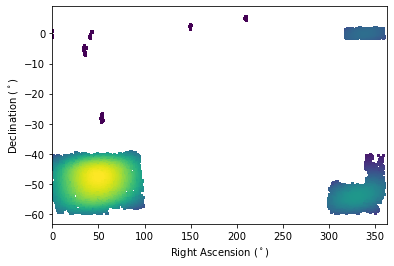

In [27]:
from scipy.stats import gaussian_kde

xy = np.vstack([RA,Dec])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
RA, Dec, z = RA[idx], Dec[idx], z[idx]

plt.scatter(RA, Dec, c=z, s=10, marker="s", linewidth=0)

plt.xlim(0, 363)

plt.xlabel("Right Ascension ($^\circ$)")
plt.ylabel("Declination ($^\circ$)")

Text(0, 0.5, 'Declination ($^\\circ$)')

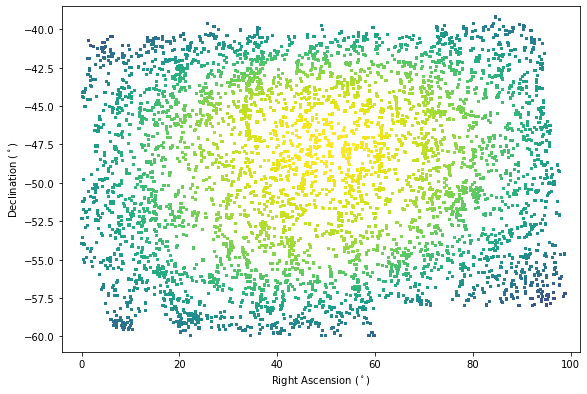

In [28]:
from scipy.stats import gaussian_kde

plt.figure(1).add_axes((0,0,1.2,1.2))

xy = np.vstack([RA,Dec])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
RA, Dec, z = RA[idx], Dec[idx], z[idx]

plt.scatter(RA, Dec, c=z, s=10, marker="s", linewidth=0)

plt.xlim(-4, 102)
plt.ylim(-61, -38.5)

plt.xlabel("Right Ascension ($^\circ$)")
plt.ylabel("Declination ($^\circ$)")

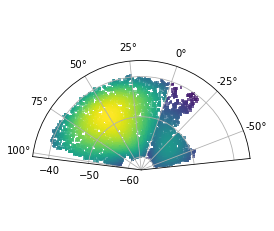

In [29]:
import numpy as np
import matplotlib.pyplot as plt

RA_rad = RA*np.pi/180

xyx = np.vstack([RA_rad,Dec])
zx = gaussian_kde(xyx)(xyx)

# Sort the points by density, so that the densest points are plotted last
idxy = z.argsort()
RA_rad, Dec, zx = RA_rad[idxy], Dec[idxy], zx[idxy]

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(RA_rad, Dec, c=zx, s=8, marker="s", linewidth=0, alpha = 0.75)
ax.set_rticks([0, -40, -50, -60])

ax.set_thetamin(102)
ax.set_thetamax(-65)
ax.set_rmax(-36)

ax.set_theta_zero_location('N', offset=-19)

plt.show()

(0.18, 0.72)

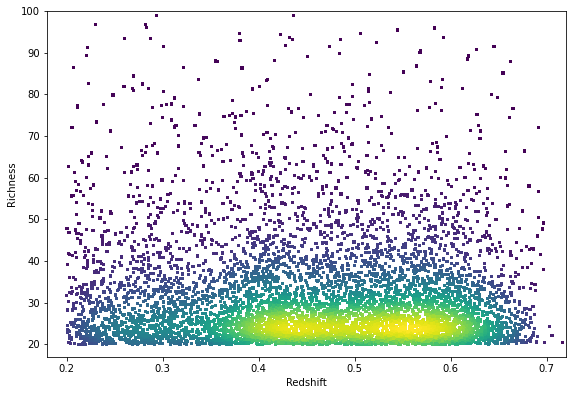

In [12]:
xyy = np.vstack([Z, Lambda])
zz = gaussian_kde(xyy)(xyy)

plt.figure(1).add_axes((0,0,1.2,1.2))

# Sort the points by density, so that the densest points are plotted last
idxx = z.argsort()
Z, Lambda, zz = Z[idxx], Lambda[idxx], zz[idxx]

plt.scatter(Z, Lambda, c=zz, s=10, marker="s", linewidth=0)

plt.xlabel("Redshift")
plt.ylabel("Richness")

plt.ylim(17, 100)
plt.xlim(0.18, 0.72)

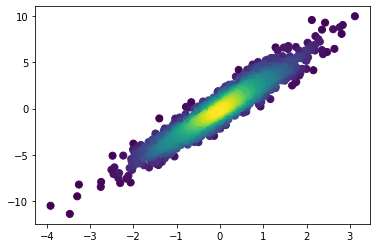

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate fake data
x = np.random.normal(size=1000)
y = x * 3 + np.random.normal(size=1000)

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=50)
plt.show()